# BAGIAN IMPORT #

In [ ]:
import pandas  as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
import pandas as pd # to import csv and for data manipulation
import matplotlib.pyplot as plt # to plot graph
import seaborn as sns # for intractve graphs
import numpy as np # for linear algebra
import datetime # to dela with date and time
%matplotlib inline
from sklearn.preprocessing import StandardScaler # for preprocessing the data
from sklearn.svm import SVC # for SVM classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold # For cross validation
from sklearn.model_selection import GridSearchCV # for tunnig hyper parameter it will use all combination of given parameters
from sklearn.model_selection import RandomizedSearchCV # same for tunning hyper parameter but will use random combinations of parameters
from sklearn.metrics import confusion_matrix,recall_score,precision_recall_curve,auc,roc_curve,roc_auc_score,classification_report
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving data_log_mk_x.csv to data_log_mk_x.csv


In [ ]:
import pandas as pd
df = pd.read_csv('data_log_mk_x.csv') 
print (df)

     A submission has been submitted  ...  Status Kelulusan
0                                  5  ...                 1
1                                  6  ...                 1
2                                  7  ...                 1
3                                  3  ...                 1
4                                  5  ...                 1
..                               ...  ...               ...
227                                3  ...                 1
228                                5  ...                 1
229                                4  ...                 1
230                                4  ...                 1
231                                3  ...                 1

[232 rows x 13 columns]



# Pre-processing data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 13 columns):
 #   Column                                        Non-Null Count  Dtype
---  ------                                        --------------  -----
 0   A submission has been submitted               232 non-null    int64
 1   Course activity completion updated            232 non-null    int64
 2   Course module viewed                          232 non-null    int64
 3   Course viewed                                 232 non-null    int64
 4   Discussion viewed                             232 non-null    int64
 5   Quiz attempt started                          232 non-null    int64
 6   Quiz attempt submitted                        232 non-null    int64
 7   Some content has been posted.                 232 non-null    int64
 8   The status of the submission has been viewed  232 non-null    int64
 9   User graded                                   232 non-null    int64
 10  File          

In [ ]:
df['Status Kelulusan'].value_counts()

1    219
0     13
Name: Status Kelulusan, dtype: int64

1    219
0     13
Name: Status Kelulusan, dtype: int64

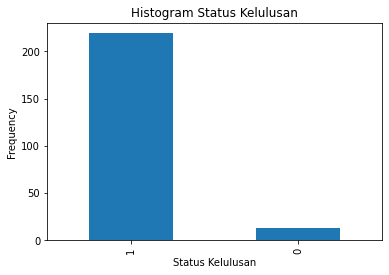

In [ ]:
pd.value_counts(df['Status Kelulusan']).plot.bar()
plt.title('Histogram Status Kelulusan')
plt.xlabel('Status Kelulusan')
plt.ylabel('Frequency')
df['Status Kelulusan'].value_counts()

In [ ]:
# Untuk memeriksa persentase dari tiap kategori
Count_Lulus = len(df[df["Status Kelulusan"]==1]) # lulus
Count_Tidak_Lulus = len(df[df["Status Kelulusan"]==0]) # tidak lulus by 1
Percentage_of_lulus = Count_Lulus/(Count_Lulus+Count_Tidak_Lulus)
print("persentase dari lulus",Percentage_of_lulus*100)
Percentage_of_Tidak_Lulus= Count_Tidak_Lulus/(Count_Lulus+Count_Tidak_Lulus)
print("persentase dari tidak lulus",Percentage_of_Tidak_Lulus*100)

persentase dari lulus 94.39655172413794
persentase dari tidak lulus 5.603448275862069


In [ ]:
# untuk memeriksa apakah ada missing value
df.isnull().sum()

A submission has been submitted                 0
Course activity completion updated              0
Course module viewed                            0
Course viewed                                   0
Discussion viewed                               0
Quiz attempt started                            0
Quiz attempt submitted                          0
Some content has been posted.                   0
The status of the submission has been viewed    0
User graded                                     0
File                                            0
URL                                             0
Status Kelulusan                                0
dtype: int64

In [ ]:
# untuk membagi variabel dalam data menjadi fitur (X) dan variabel target (y)
X = df.drop(['Status Kelulusan'], axis=1)

y = df['Status Kelulusan']

In [ ]:
# membagi X dan y dalam data latih dan data uji, dengan proporsi 0,8 data uji dan 0,2 data latih

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

In [ ]:
# memeriksa jumlah data latih dan data uji

X_train.shape, X_test.shape

((185, 12), (47, 12))

In [ ]:
y_test.value_counts()

1    42
0     5
Name: Status Kelulusan, dtype: int64

In [ ]:
cols = X_train.columns

In [ ]:
# untuk standarisasi, dengan melakukan penyesuaian skala pada data uji
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [ ]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [ ]:
X_train.head()

,A submission has been submitted,Course activity completion updated,Course module viewed,Course viewed,Discussion viewed,Quiz attempt started,Quiz attempt submitted,Some content has been posted.,The status of the submission has been viewed,User graded,File,URL
0,-0.009319,1.770466,2.662086,1.011214,0.703961,0.145860,0.203256,-0.811401,2.598332,0.143393,3.854295,3.695699
1,0.421679,-2.067782,-0.252793,0.519746,0.286206,0.696558,0.203256,0.462182,0.505589,0.790413,-0.334336,-1.078772
2,-0.871314,-1.842002,-1.338728,-1.287860,-1.189267,0.145860,0.203256,-1.100852,-0.947705,0.790413,0.619741,-0.123878
3,0.852677,-0.157341,0.118711,-0.796391,-0.495972,0.696558,0.756232,-0.348280,-0.075728,0.790413,0.363769,-0.497532
4,-0.440317,-0.209444,-0.002742,0.902925,-0.451530,0.145860,0.203256,-0.927181,0.389326,0.143393,-0.799739,-0.248430


In [ ]:
# untuk mengecek kembali banyaknya observasi dan dimensi pada fitur (X) dan variabel target (y)
X, y = df.iloc[:, :-1], df.iloc[:, [-1]]
print('Dimensi dari X: {}'.format(X.shape))
print('Dimensi dari y: {}'.format(y.shape))

Dimensi dari X: (232, 12)
Dimensi dari y: (232, 1)


In [ ]:
# untuk melihat banyaknya observasi dan dimensi fitur (X) dan variabel target (y) pada data latih dan data uji
print("Jumlah Kelulusan X_train dataset: ", X_train.shape)
print("Jumlah Kelulusan y_train dataset: ", y_train.shape)
print("Jumlah Kelulusan X_test dataset: ", X_test.shape)
print("Jumlah Kelulusan y_test dataset: ", y_test.shape)

Jumlah Kelulusan X_train dataset:  (185, 12)
Jumlah Kelulusan y_train dataset:  (185,)
Jumlah Kelulusan X_test dataset:  (47, 12)
Jumlah Kelulusan y_test dataset:  (47,)



# SMOTE

In [ ]:
# melihat banyaknya data antar label, sebelum dilakukan oversampling
print("Sebelum OverSampling, jumlah dari label '1': {}".format(sum(y_train==1)))
print("Sebelum OverSampling, jumlah dari label '0': {} \n".format(sum(y_train==0)))

Sebelum OverSampling, jumlah dari label '1': 177
Sebelum OverSampling, jumlah dari label '0': 8 



In [ ]:
# pembangunan data sintetik untuk label '0' pada data latih menggunakan SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(k_neighbors=5, random_state=42)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.values.ravel())


In [ ]:
# hasil dari SMOTE
print('Setelah OverSampling, dimensi dari train_X: {}'.format(X_train_res.shape))
print('Setelah OverSampling, dimensi dari train_y: {} \n'.format(y_train_res.shape))

print("Setelah OverSampling, jumlah dari label '1': {}".format(sum(y_train_res==1)))
print("Setelah OverSampling, jumlah dari label '0': {}".format(sum(y_train_res==0)))

Setelah OverSampling, dimensi dari train_X: (354, 12)
Setelah OverSampling, dimensi dari train_y: (354,) 

Setelah OverSampling, jumlah dari label '1': 177
Setelah OverSampling, jumlah dari label '0': 177


1    177
0      8
Name: Status Kelulusan, dtype: int64

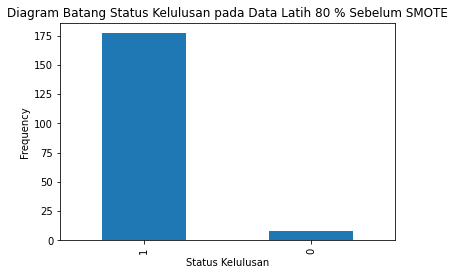

In [ ]:
pd.value_counts(y_train).plot.bar()
plt.title('Diagram Batang Status Kelulusan pada Data Latih 80 % Sebelum SMOTE')
tick_label = ['Lulus', 'Tidak Lulus']
plt.xlabel('Status Kelulusan')
plt.ylabel('Frequency')
y_train.value_counts()

In [ ]:
print(y_train)

77     1
34     1
142    1
70     1
101    1
      ..
129    1
197    1
183    1
174    1
122    1
Name: Status Kelulusan, Length: 185, dtype: int64


Text(0.5, 0, 'Status Kelulusan')

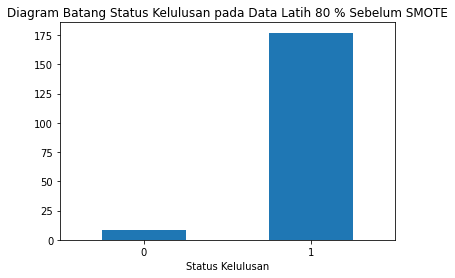

In [ ]:
y_train.value_counts(sort=False).plot.bar(rot=0)
plt.title('Diagram Batang Status Kelulusan pada Data Latih 80 % Sebelum SMOTE')
plt.xlabel('Status Kelulusan')

In [ ]:
pd.value_counts(y_train_res).plot.bar()
plt.title('Diagram Batang Status Kelulusan pada Data Latih 80% Setelah SMOTE')
plt.xlabel('Status Kelulusan')
plt.ylabel('Frequency')
y_train_res.value_counts()

ValueError: ignored

In [ ]:
print(y_train_res)

[1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
import pandas as pd

# Create the dataframe
y_train_res = pd.DataFrame(y_train_res)

In [ ]:
print(y_train_res)

     0
0    1
1    1
2    1
3    1
4    1
..  ..
349  0
350  0
351  0
352  0
353  0

[354 rows x 1 columns]


Text(0.5, 0, 'Status Kelulusan')

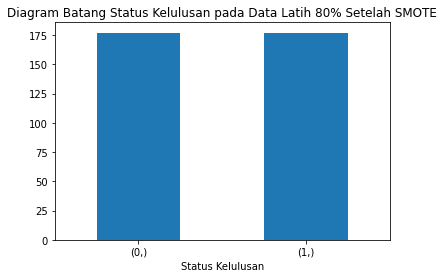

In [ ]:
y_train_res.value_counts(sort=False).plot.bar(rot=0)
plt.title('Diagram Batang Status Kelulusan pada Data Latih 80% Setelah SMOTE')
plt.xlabel('Status Kelulusan')

In [ ]:
X_train_res = pd.DataFrame(X_train_res)
X_train_res.tail()

,0,1,2,3,4,5,6,7,8,9,10,11
349,-1.005635,-1.940559,-1.469692,-1.040682,-0.757340,-1.849482,-1.800341,-1.111624,-0.987192,-1.271044,-0.998574,-1.164131
350,0.320053,1.117406,-0.438951,0.121135,-1.120460,0.145860,0.203256,-1.264162,0.460673,0.637851,0.096824,0.447572
351,-1.746689,-2.045447,-1.811710,-1.542044,-1.299239,-5.378211,-5.343669,-1.390302,-1.830508,-5.052846,-1.312251,-0.978708
352,-0.995415,-0.915030,-1.333613,-0.999130,-1.286797,-3.475459,-3.433045,-1.370480,-0.963765,-3.038834,-0.810333,-0.470878
353,-1.841121,-2.067801,-1.901402,-1.669040,-1.298151,-5.498869,-5.464826,-1.361341,-1.906928,-5.194607,-1.474680,-1.078843


In [ ]:
# importing the modules
from tabulate import tabulate
import pandas as pd

df = pd.DataFrame(X_train_res)
df.columns = ['A submission has been submitted', 'Course activity completion updated', 'Course module viewed', 'Course viewed','Discussion viewed','Quiz attempt started','Quiz attempt submitted','Some content has been posted','The status of the submission has been viewed','User graded','File','URL']
# displaying the DataFrame
print(tabulate(df, headers = 'keys', tablefmt = 'fancy_grid'))

╒═════╤═══════════════════════════════════╤══════════════════════════════════════╤════════════════════════╤═════════════════╤═════════════════════╤════════════════════════╤══════════════════════════╤════════════════════════════════╤════════════════════════════════════════════════╤═══════════════╤═════════════╤══════════════╕
│     │   A submission has been submitted │   Course activity completion updated │   Course module viewed │   Course viewed │   Discussion viewed │   Quiz attempt started │   Quiz attempt submitted │   Some content has been posted │   The status of the submission has been viewed │   User graded │        File │          URL │
╞═════╪═══════════════════════════════════╪══════════════════════════════════════╪════════════════════════╪═════════════════╪═════════════════════╪════════════════════════╪══════════════════════════╪════════════════════════════════╪════════════════════════════════════════════════╪═══════════════╪═════════════╪══════════════╡
│   0 │            

# Penentuan Parameter Optimal untuk SVM-RFE

In [ ]:
from sklearn.model_selection import GridSearchCV

# mendefinisikan range dari parameter
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'kernel': ['linear']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting model untuk grid search

grid.fit(X_train_res, y_train_res)
# print parameter terbaik setelah tuning
print(grid.best_params_)

# print bagaimana model terlihat setelah hyper-parameter tuning
print(grid.best_estimator_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] C=0.1, kernel=linear ............................................
[CV] ................ C=0.1, kernel=linear, score=0.930, total=   0.0s
[CV] C=0.1, kernel=linear ............................................
[CV] ................ C=0.1, kernel=linear, score=0.986, total=   0.0s
[CV] C=0.1, kernel=linear ............................................
[CV] ................ C=0.1, kernel=linear, score=0.972, total=   0.0s
[CV] C=0.1, kernel=linear ............................................
[CV] ................ C=0.1, kernel=linear, score=0.972, total=   0.0s
[CV] C=0.1, kernel=linear ............................................
[CV] ................ C=0.1, kernel=linear, score=0.971, total=   0.0s
[CV] C=1, kernel=linear ..............................................
[CV] .................. C=1, kernel=linear, score=0.986, total=   0.0s
[CV] C=1, kernel=linear ..............................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.1s finished


# Seleksi Fitur

In [ ]:
#PEMBENTUKAN SVM DENGAN KERNEL LINEAR DAN PARAMETER OPTIMAL C=10

# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score

# instantiate classifier with linear kernel and C=10
linear_svc=SVC(kernel='linear', C=10) 


# fit classifier to training set
linear_svc.fit(X_train_res, y_train_res)


# make predictions on test set
y_pred_test=linear_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=10 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))
print ('coefficients',linear_svc.coef_)

Model accuracy score with linear kernel and C=10 : 0.8936
coefficients [[-0.68911227 -0.78892791  5.06172484 -3.4998017  -2.31041773  1.70847015
   1.71553815  5.38416633  0.72207373 -2.90908343 -0.97514096  0.50053372]]


In [ ]:
# Proses seleksi fitur menggunakan SVM-RFE
from sklearn.datasets import load_digits
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

# membuat proses rekursif dan memberi peringkat tiap fitur
rfe = RFE(estimator=linear_svc, n_features_to_select=1, step=1)
rfe.fit(X_train_res, y_train_res)
# print ringkasan untuk atribut yang terpilih
print(rfe.support_)
print(rfe.ranking_)
# print berat bobot untuk fitur terpilih
print ('coefficients',rfe.estimator_.coef_)

[False False False False False False False  True False False False False]
[10  9  3  4  2  8  5  1 11  6  7 12]
coefficients [[7.35578382]]


In [ ]:
# untuk melihat bentuk fitur pada data latih
X_train_res = pd.DataFrame(X_train_res)
X_train_res.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.009319,1.770466,2.662086,1.011214,0.703961,0.145860,0.203256,-0.811401,2.598332,0.143393,3.854295,3.695699
1,0.421679,-2.067782,-0.252793,0.519746,0.286206,0.696558,0.203256,0.462182,0.505589,0.790413,-0.334336,-1.078772
2,-0.871314,-1.842002,-1.338728,-1.287860,-1.189267,0.145860,0.203256,-1.100852,-0.947705,0.790413,0.619741,-0.123878
3,0.852677,-0.157341,0.118711,-0.796391,-0.495972,0.696558,0.756232,-0.348280,-0.075728,0.790413,0.363769,-0.497532
4,-0.440317,-0.209444,-0.002742,0.902925,-0.451530,0.145860,0.203256,-0.927181,0.389326,0.143393,-0.799739,-0.248430


In [ ]:
# menghapus fitur yang tidak terpilih pada seleksi fitur dalam data latih
X_train_res.drop(X_train_res.columns[[0, 1, 5, 8, 10, 11]], axis = 1, inplace = True)

In [ ]:
# hasil dari data train yang telah terpilih fiturnya
X_train_res.head()

,2,3,4,6,7,9
0,2.662086,1.011214,0.703961,0.203256,-0.811401,0.143393
1,-0.252793,0.519746,0.286206,0.203256,0.462182,0.790413
2,-1.338728,-1.287860,-1.189267,0.203256,-1.100852,0.790413
3,0.118711,-0.796391,-0.495972,0.756232,-0.348280,0.790413
4,-0.002742,0.902925,-0.451530,0.203256,-0.927181,0.143393


In [ ]:
# pada data uji juga dilakukan penghapusan fitur yang tidak terpilih pada seleksi fitur
X_test.head()

,A submission has been submitted,Course activity completion updated,Course module viewed,Course viewed,Discussion viewed,Quiz attempt started,Quiz attempt submitted,Some content has been posted.,The status of the submission has been viewed,User graded,File,URL
0,-0.009319,-1.720429,-0.309947,-0.121663,-0.887062,0.145860,0.203256,-0.927181,-0.133860,0.143393,-0.055094,-0.829670
1,-0.440317,1.110496,-0.502844,0.802965,-0.638187,0.145860,0.203256,-0.406170,-0.017597,0.143393,-0.939360,0.457362
2,-0.440317,0.137908,0.225876,0.236526,0.117327,-0.404837,-0.349720,1.504205,-0.657046,-0.503626,0.177608,-0.165395
3,-0.009319,-1.390444,-0.059896,-0.055023,-0.131548,0.696558,0.756232,-0.753511,-0.831441,1.437432,1.038604,-1.618495
4,-0.871314,0.797879,-0.002742,-0.379892,-0.655963,-0.404837,-0.349720,-1.158742,-0.308255,-0.503626,0.177608,0.955567


In [ ]:
# penghapusan fitur pada data uji
X_test.drop(X_test.columns[[0, 1, 5, 8, 10, 11]], axis=1, inplace=True)
X_test.head()

,Course module viewed,Course viewed,Discussion viewed,Quiz attempt submitted,Some content has been posted.,User graded
0,-0.309947,-0.121663,-0.887062,0.203256,-0.927181,0.143393
1,-0.502844,0.802965,-0.638187,0.203256,-0.406170,0.143393
2,0.225876,0.236526,0.117327,-0.349720,1.504205,-0.503626
3,-0.059896,-0.055023,-0.131548,0.756232,-0.753511,1.437432
4,-0.002742,-0.379892,-0.655963,-0.349720,-1.158742,-0.503626


# Klasifikasi menggunakan fitur terpilih dengan SVM dan fungsi Kernel RBF

In [ ]:
from sklearn.model_selection import GridSearchCV

# untuk mendefinisikan range dari parameter
param_grid = {'C': [0.1, 1, 10, 100, 1000],
			'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
			'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting model pada gridsearch

grid.fit(X_train_res, y_train_res)
# print parameter terbaik setelah tuning
print(grid.best_params_)

# print bagaimana model setelah hyper-parameter tuning
print(grid.best_estimator_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.901, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.901, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.972, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.930, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.957, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.859, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ............ C=1, gamma=1, kernel=rbf, score=0.958, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=1.000, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.986, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.958, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.986, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.972, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.986, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    0.7s finished


In [ ]:
# instantiate classifier with rbf kernel and C=100
svc=SVC(C=100, gamma=0.1) 


# fit classifier to training set
svc.fit(X_train_res,y_train_res)


# make predictions on test set
y_pred2=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100 : {0:0.4f}'. format(accuracy_score(y_test, y_pred2)))

Model accuracy score with rbf kernel and C=100 : 0.9362


In [ ]:
# hasil prediksi dari klasifikasi
y_pred_train1 = svc.predict(X_train_res)

y_pred_train1

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
# akurasi dari model yang terbentuk pada data latih yang diuji pada data uji
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train_res, y_pred_train1)))

Training-set accuracy score: 1.0000


In [ ]:
# print the scores on training and test set
# untuk melihat apakah model overfitting
print('Training set score: {:.4f}'.format(svc.score(X_train_res, y_train_res)))

print('Test set score: {:.4f}'.format(svc.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.9362


karena selisih training set score dan test score tidak begitu jauh, maka model tidak overfitting

In [ ]:
#untuk melihat jumlah observasi pada tiap label data uji
y_test.value_counts()

1    42
0     5
Name: Status Kelulusan, dtype: int64

In [ ]:
# Print Confusion Matrix dan membaginya menjadi 4 bagian

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred2)
print(cm)

[[ 3  2]
 [ 1 41]]


In [ ]:
# fungsi untuk plot confusion Matrix
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd' 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
class_names=np.array(['0','1']) # Binary label, Class = 1 (lulus) and Class = 0 (tidak lulus)

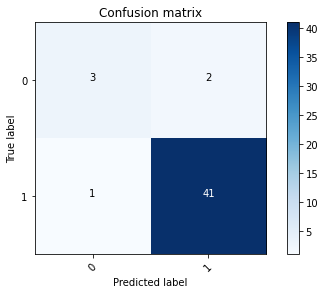

In [ ]:
import itertools
cm = confusion_matrix(y_test, y_pred2)
plot_confusion_matrix(cm,class_names)

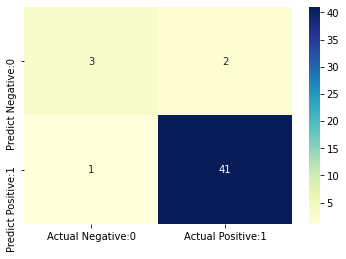

In [ ]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Negative:0', 'Actual Positive:1'], 
                                 index=['Predict Negative:0', 'Predict Positive:1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
# hasil laporan klasifikasi
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.95      0.98      0.96        42

    accuracy                           0.94        47
   macro avg       0.85      0.79      0.82        47
weighted avg       0.93      0.94      0.93        47



In [ ]:
TN = cm[0,0]
FP = cm[1,0]
TP = cm[1,1]
FN = cm[0,1]
# print akurasi dari klasifikasi pada data uji

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9362


In [ ]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0638


In [ ]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9762


In [ ]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9535


In [ ]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.9535


In [ ]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.2500


In [ ]:
specificity = TN / float(TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.7500


In [ ]:
F1 = 2 * (precision * recall) / (precision + recall)
print('F1-Score : {0:0.4f}'.format(F1))

F1-Score : 0.9647


COBA KELUARIN BENTUK MODEL

In [ ]:
print('b = ',svc.intercept_)
print('Indices of support vectors = ', svc.support_)
print('Support vectors = ', svc.support_vectors_)
print('Number of support vectors for each class = ', svc.n_support_)
print('Coefficients of the support vector in the decision function = ', svc.dual_coef_)

b =  [2.98503957]
Indices of support vectors =  [ 12  41 115 148 197 219 278 288 303 310 332   4   8  43  48  67  81 121
 126 137]
Support vectors =  [[-9.88656601e-01 -4.21541943e-01 -3.18204464e-01 -3.49719920e-01
  -9.85071401e-01  1.43393462e-01]
 [-1.93884978e+00 -1.79598841e+00 -1.38481160e+00 -5.87947934e+00
  -1.39030249e+00 -5.67978007e+00]
 [-4.17111830e-01  5.03085679e-01 -6.38186606e-01  2.03256022e-01
  -1.04296156e+00  1.43393462e-01]
 [-2.30320958e+00 -2.19582738e+00 -1.40258839e+00 -5.87947934e+00
  -1.39030249e+00 -5.67978007e+00]
 [-6.01477871e-01  2.04823946e-01 -5.34968374e-01  2.48798205e-02
  -1.02428764e+00  1.43393462e-01]
 [-1.03087349e+00 -3.97929968e-01 -9.30963726e-01 -2.25817921e+00
  -1.19757176e+00 -2.16064320e+00]
 [-4.19475385e-01  4.61748521e-01 -6.90381386e-01  2.03256022e-01
  -1.06690134e+00  1.96906882e-01]
 [-6.48386922e-01  1.63568743e-01 -7.48509652e-01 -7.24251674e-01
  -1.10122112e+00 -7.24803966e-01]
 [-1.35453100e+00 -8.92458368e-01 -6.52209

# COBA KERNEL LINIER

In [ ]:
from sklearn.model_selection import GridSearchCV

# untuk mendefinisikan range dari parameter
param_grid = {'C': [0.1, 1, 10, 100, 1000],
			'kernel': ['linear']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting model pada gridsearch

grid.fit(X_train_res, y_train_res)
# print parameter terbaik setelah tuning
print(grid.best_params_)

# print bagaimana model setelah hyper-parameter tuning
print(grid.best_estimator_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] C=0.1, kernel=linear ............................................
[CV] ................ C=0.1, kernel=linear, score=0.944, total=   0.0s
[CV] C=0.1, kernel=linear ............................................
[CV] ................ C=0.1, kernel=linear, score=0.986, total=   0.0s
[CV] C=0.1, kernel=linear ............................................
[CV] ................ C=0.1, kernel=linear, score=0.915, total=   0.0s
[CV] C=0.1, kernel=linear ............................................
[CV] ................ C=0.1, kernel=linear, score=0.915, total=   0.0s
[CV] C=0.1, kernel=linear ............................................
[CV] ................ C=0.1, kernel=linear, score=0.971, total=   0.0s
[CV] C=1, kernel=linear ..............................................
[CV] .................. C=1, kernel=linear, score=0.986, total=   0.0s
[CV] C=1, kernel=linear ..............................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.2s finished


In [ ]:
# instantiate classifier with linear kernel and C=100
svc_linear=SVC(kernel='linear', C=100) 


# fit classifier to training set
svc_linear.fit(X_train_res,y_train_res)


# make predictions on test set
y_pred3=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=100 : {0:0.4f}'. format(accuracy_score(y_test, y_pred3)))

Model accuracy score with linear kernel and C=100 : 0.9149


In [ ]:
# hasil laporan klasifikasi
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       1.00      0.20      0.33         5
           1       0.91      1.00      0.95        42

    accuracy                           0.91        47
   macro avg       0.96      0.60      0.64        47
weighted avg       0.92      0.91      0.89        47



In [ ]:
# Print Confusion Matrix dan membaginya menjadi 4 bagian

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred3)
print(cm)

[[ 1  4]
 [ 0 42]]


In [ ]:
TN = cm[0,0]
FP = cm[1,0]
TP = cm[1,1]
FN = cm[0,1]
# print akurasi dari klasifikasi pada data uji

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9149


In [ ]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0851


In [ ]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 1.0000


In [ ]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9130


In [ ]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.9130


In [ ]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.0000


In [ ]:
specificity = TN / float(TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 1.0000


In [ ]:
F1 = 2 * (precision * recall) / (precision + recall)
print('F1-Score : {0:0.4f}'.format(F1))

F1-Score : 0.9545
